<a href="https://colab.research.google.com/github/aalexakos/thesis-smart-grids/blob/main/analytics_per_weather_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import datetime
import time
import numpy as np
from ast import literal_eval
from sklearn.metrics import *
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

data_location = '/content/drive/MyDrive/alexakos-thesis/'

csv=(f'{data_location}datasets/monthly_data.csv') 
df=pd.read_csv(csv)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['hour']=df['datetime'].dt.hour.reset_index(drop=True)
df.drop(df[df.hour == 18].index, inplace=True)
df.drop(df[df.hour == 17].index, inplace=True)
df.drop(df[df.hour == 16].index, inplace=True)

Mounted at /content/drive/


In [3]:
csv=(f'{data_location}datasets/effective_irradiance.csv') 
effective_irradiance=pd.read_csv(csv)
effective_irradiance['datetime'] = pd.to_datetime(effective_irradiance['datetime'], errors='coerce')
effective_irradiance.fillna(0, inplace=True)
effective_irradiance.head(20)

,datetime,effective_irradiance
0,2021-06-01 05:00:00,148.606788
1,2021-06-01 06:00:00,365.502157
2,2021-06-01 07:00:00,583.104990
3,2021-06-01 08:00:00,769.212409
4,2021-06-01 09:00:00,908.677306
5,2021-06-01 10:00:00,989.993067
6,2021-06-01 11:00:00,1001.904760
7,2021-06-01 12:00:00,946.265003
8,2021-06-01 13:00:00,828.200281
9,2021-06-01 14:00:00,644.478358


In [4]:
csv=(f'{data_location}datasets/monthly_p_mp.csv') 
p_mp=pd.read_csv(csv)
p_mp['datetime'] = pd.to_datetime(p_mp['datetime'], errors='coerce')
p_mp.head(20)

,startTime,p_mp,datetime
0,2021-06-01 05:00:00+00:00,809.314399,2021-06-01 05:00:00
1,2021-06-01 06:00:00+00:00,1962.195043,2021-06-01 06:00:00
2,2021-06-01 07:00:00+00:00,3028.578494,2021-06-01 07:00:00
3,2021-06-01 08:00:00+00:00,3853.004274,2021-06-01 08:00:00
4,2021-06-01 09:00:00+00:00,4422.514830,2021-06-01 09:00:00
5,2021-06-01 10:00:00+00:00,4727.883741,2021-06-01 10:00:00
6,2021-06-01 11:00:00+00:00,4750.211519,2021-06-01 11:00:00
7,2021-06-01 12:00:00+00:00,4537.882244,2021-06-01 12:00:00
8,2021-06-01 13:00:00+00:00,4042.569371,2021-06-01 13:00:00
9,2021-06-01 14:00:00+00:00,3257.069804,2021-06-01 14:00:00


In [5]:
df=df.merge(effective_irradiance, how='inner', on='datetime').dropna().reset_index(drop=True)
df=df.merge(p_mp, how='inner', on='datetime').dropna().reset_index(drop=True)

df.tail(50)

,datetime,sensor_avg,active_power,openweathermap,timestamp,dni,dhi,climacell,temp_air,windSpeed,weatherCode,pySolar,altidute,p_solar_horizontal,horizontal_avg,openweather_modular,climacell_modular,modular_avg,hour,effective_irradiance,startTime,p_mp
297,2021-06-26 14:00:00,456.902667,1662.900000,770.91,1.624716e+09,832.01,127.97,719.21,38.00,5.28,1000.0,808.206650,44.826497,573.216358,745.060,924.903450,862.876095,893.889773,14,665.104954,2021-06-26 14:00:00+00:00,3112.974661
298,2021-06-26 15:00:00,249.768190,905.448276,609.95,1.624720e+09,809.31,100.35,568.44,36.35,3.78,1000.0,742.565254,33.208597,621.291087,589.195,894.480402,833.606754,864.043578,15,467.196393,2021-06-26 15:00:00+00:00,2272.640903
299,2021-06-27 04:00:00,64.718621,255.827586,16.49,1.624766e+09,0.00,16.49,22.67,21.46,1.95,1000.0,222.659769,7.548755,220.730073,19.580,67.338594,92.575253,79.956923,4,15.892147,2021-06-27 04:00:00+00:00,77.421076
300,2021-06-27 05:00:00,216.160250,905.200000,168.87,1.624770e+09,523.71,52.05,126.18,22.87,1.12,1000.0,561.864238,18.424396,533.063935,147.525,360.985201,269.728860,315.357031,5,136.956438,2021-06-27 05:00:00+00:00,720.123258
301,2021-06-27 06:00:00,426.955667,1809.733333,360.82,1.624774e+09,701.36,74.88,328.45,27.76,0.78,1000.0,714.110708,29.806711,619.639029,344.635,566.805597,515.956151,541.380874,6,348.872967,2021-06-27 06:00:00+00:00,1790.471293
302,2021-06-27 07:00:00,627.040250,2590.200000,555.55,1.624777e+09,799.25,90.44,517.01,29.30,0.90,1000.0,792.405702,41.410872,594.292840,536.280,704.425093,655.557227,679.991160,7,564.775440,2021-06-27 07:00:00+00:00,2802.386951
303,2021-06-27 08:00:00,785.823167,3144.533333,731.84,1.624781e+09,828.93,123.68,690.17,31.46,1.34,1000.0,836.194268,52.926808,504.086952,711.005,774.727854,730.615877,752.671865,8,751.783790,2021-06-27 08:00:00+00:00,3578.528101
304,2021-06-27 09:00:00,881.726121,3369.620690,872.87,1.624784e+09,859.45,140.20,828.58,33.30,2.33,1000.0,860.642188,63.763284,380.473338,850.725,784.152168,744.363770,764.257969,9,894.180226,2021-06-27 09:00:00+00:00,4104.350209
305,2021-06-27 10:00:00,923.260333,3406.200000,966.42,1.624788e+09,885.88,142.33,917.98,34.28,3.21,1000.0,872.262405,72.177702,266.969712,942.200,761.147269,722.996182,742.071725,10,978.561628,2021-06-27 10:00:00+00:00,4392.463905
306,2021-06-27 11:00:00,896.672750,3152.000000,1004.47,1.624792e+09,883.96,154.38,948.53,34.29,4.73,1000.0,873.695133,73.579407,246.981590,976.500,773.421427,730.348767,751.885097,11,996.396588,2021-06-27 11:00:00+00:00,4455.573421


In [6]:
csv=(f'{data_location}datasets/adapted_p_mp.csv') 
adapted_power=pd.read_csv(csv,index_col=0)
adapted_power['datetime'] = pd.to_datetime(adapted_power['datetime'], errors='coerce')

adapted_power.tail(10)
df=df.merge(adapted_power, how='inner', on='datetime').dropna().reset_index(drop=True)
df['weatherCode'] = df['weatherCode'].astype(int)

In [7]:
df.tail(30)

,datetime,sensor_avg,active_power,openweathermap,timestamp,dni,dhi,climacell,temp_air,windSpeed,weatherCode,pySolar,altidute,p_solar_horizontal,horizontal_avg,openweather_modular,climacell_modular,modular_avg,hour,effective_irradiance,startTime,p_mp,p_mp_adapted
317,2021-06-28 10:00:00,909.548500,3251.033333,965.72,1.624874e+09,886.68,141.24,916.55,35.04,3.84,1000,871.982152,72.115741,267.781516,941.135,761.352682,722.588122,741.970402,10,978.296296,2021-06-28 10:00:00+00:00,4374.271070,3414.967016
318,2021-06-28 11:00:00,882.167667,3027.833333,1003.97,1.624878e+09,884.89,153.20,953.85,35.52,4.62,1000,873.449215,73.545955,247.401188,978.910,773.456037,734.843711,754.149874,11,996.357188,2021-06-28 11:00:00+00:00,4427.014655,3314.625284
319,2021-06-28 12:00:00,793.973333,2781.900000,983.48,1.624882e+09,885.90,146.72,919.76,35.59,5.07,1000,865.025138,66.645169,342.916951,951.620,845.162923,790.404533,817.783728,12,947.746925,2021-06-28 12:00:00+00:00,4253.069668,2892.244349
320,2021-06-28 13:00:00,646.454583,2320.200000,906.01,1.624885e+09,860.01,148.97,842.68,34.99,5.17,1000,844.847116,56.256575,469.291290,874.345,912.023073,848.272760,880.147917,13,836.637372,2021-06-28 13:00:00+00:00,3851.585359,2493.413491
321,2021-06-28 14:00:00,458.219483,1676.758621,778.12,1.624889e+09,856.12,116.32,721.30,34.07,3.31,1000,807.835909,44.857900,572.641193,749.710,933.087863,864.951775,899.019819,14,671.164443,2021-06-28 14:00:00+00:00,3199.905542,1890.430440
322,2021-06-28 15:00:00,254.960833,929.200000,610.94,1.624892e+09,811.98,99.31,559.60,32.34,2.99,1000,742.256267,33.239837,620.810819,585.270,895.392558,820.148746,857.770652,15,468.670093,2021-06-28 15:00:00+00:00,2323.773577,1022.884509
323,2021-06-29 04:00:00,64.822241,258.448276,15.18,1.624939e+09,0.00,15.18,21.26,21.07,1.99,1000,216.070874,7.417400,214.262793,18.220,62.860074,88.037231,75.448652,4,14.622573,2021-06-29 04:00:00+00:00,71.087707,272.951721
324,2021-06-29 05:00:00,214.520417,897.566667,166.79,1.624943e+09,521.89,51.55,124.68,22.31,1.31,1000,558.741191,18.292707,530.505449,145.735,358.232593,267.788475,313.010534,5,135.235334,2021-06-29 05:00:00+00:00,712.745934,1589.862990
325,2021-06-29 06:00:00,420.071667,1796.066667,358.61,1.624946e+09,700.73,74.40,318.03,27.11,0.30,1000,712.411681,29.675736,618.972657,338.320,564.906571,500.982228,532.944400,6,347.103615,2021-06-29 06:00:00+00:00,1787.013327,1799.419840
326,2021-06-29 07:00:00,623.490583,2575.133333,553.42,1.624950e+09,799.27,89.78,505.32,29.37,0.50,1000,791.301162,41.279911,594.659258,529.370,703.246092,642.124092,672.685092,7,563.230019,2021-06-29 07:00:00+00:00,2794.447796,2620.490685


In [8]:
#export discrete weather codes
wcode_errors = pd.DataFrame(columns=['weather_code','sensor_avg/clima','sensor_avg/openw','sensor_avg/horiz_avg','sensor_avg/tomorrow_modular','sensor_avg/openweathermap_modular','p_mp/active_power','adapted_power/activePower'])
wcode_errors['weather_code']=df['weatherCode']
wcode_errors=wcode_errors.drop_duplicates()
wcode_errors.sort_values(by='weather_code', ignore_index=True)

,weather_code,sensor_avg/clima,sensor_avg/openw,sensor_avg/horiz_avg,sensor_avg/tomorrow_modular,sensor_avg/openweathermap_modular,p_mp/active_power,adapted_power/activePower
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4200,NaN,NaN,NaN,NaN,NaN,NaN,NaN


for weather code  1101 there are  36 results
for weather code  1100 there are  56 results
for weather code  1102 there are  11 results
for weather code  1001 there are  71 results
for weather code  1000 there are  152 results
for weather code  4000 there are  13 results
for weather code  4200 there are  8 results


Text(0.5, 1.0, 'Error % (park irradiance - sensor average) vs  (tomorrow) per weather code')

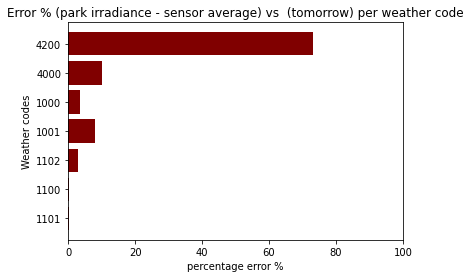

In [9]:
#Error % (park irradiance - sensor average) vs  (climacell) per weather code
sensor1=[]
climacell_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor1.append(df.iloc[i].sensor_avg)
      climacell_temp.append(df.iloc[i].climacell)
  print("for weather code ",code,"there are ",len(climacell_temp),"results")

  wcode_errors.loc[wcode_errors['weather_code'] == code, 'sensor_avg/clima'] = abs(sum(climacell_temp)-sum(sensor1))/sum(sensor1)*100
  sensor1.clear()
  climacell_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)
sensor1.clear()
climacell_temp.clear()
# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['sensor_avg/clima'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - sensor average) vs  (tomorrow) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - sensor average) vs  (openweathermap) per weather code')

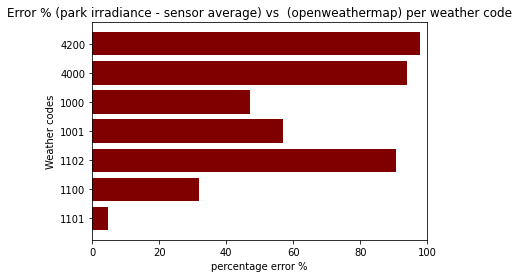

In [10]:
#Error % (park irradiance - sensor average) vs  (openweathermap) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)
count=0
sensor=[]
openweathermap_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor.append(df.iloc[i].sensor_avg)
      openweathermap_temp.append(df.iloc[i].openweathermap)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'sensor_avg/openw'] = abs(sum(openweathermap_temp)-sum(sensor))/sum(sensor)*100
  openweathermap_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['sensor_avg/openw'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - sensor average) vs  (openweathermap) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - sensor average) vs  (horizonal_average) per weather code')

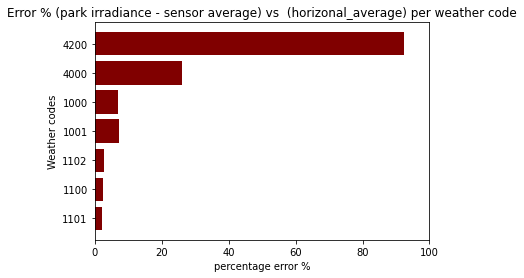

In [11]:
#Error % (park irradiance - sensor average) vs  (horizonal_average) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)

sensor=[]
horizonal_average_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor.append(df.iloc[i].sensor_avg)
      horizonal_average_temp.append(df.iloc[i].horizontal_avg)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'sensor_avg/horiz_avg'] = abs(sum(horizonal_average_temp)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  horizonal_average_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['sensor_avg/horiz_avg'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - sensor average) vs  (horizonal_average) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - sensor average) vs \n (tomorrow_modular) per weather code')

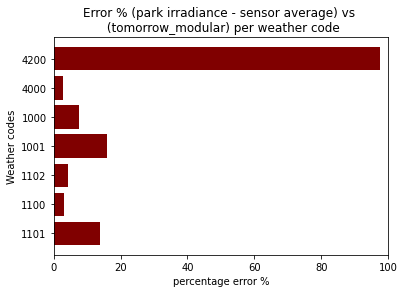

In [12]:
#Error % (park irradiance - sensor average) vs  (tomorrow_modular) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)

sensor=[]
climacell_mod=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor.append(df.iloc[i].sensor_avg)
      climacell_mod.append(df.iloc[i].climacell_modular)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'sensor_avg/tomorrow_modular'] = abs(sum(climacell_mod)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  climacell_mod.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['sensor_avg/tomorrow_modular'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])  
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - sensor average) vs \n (tomorrow_modular) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - sensor average) vs \n (openweathermap_modular) per weather code')

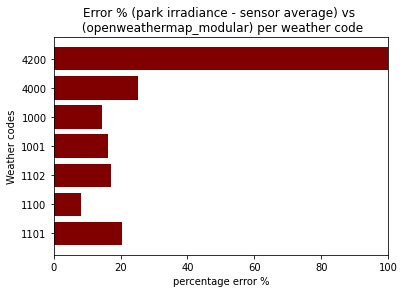

In [13]:
#Error % (park irradiance - sensor average) vs  (openweathermap_modular) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)

sensor=[]
openw_mod=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      sensor.append(df.iloc[i].sensor_avg)
      openw_mod.append(df.iloc[i].openweather_modular)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'sensor_avg/openweathermap_modular'] = abs(sum(openw_mod)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  openw_mod.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['sensor_avg/openweathermap_modular'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])  
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - sensor average) vs \n (openweathermap_modular) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - active_power average) vs  (p_mp) per weather code')

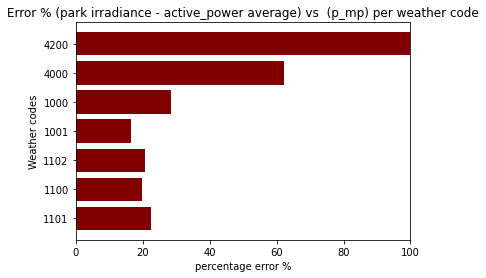

In [14]:
#Error % (park irradiance - active_power average) vs  (p_mp) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)

active_power=[]
p_mp_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      active_power.append(df.iloc[i].active_power)
      p_mp_temp.append(df.iloc[i].p_mp)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'p_mp/active_power'] = abs(sum(p_mp_temp)-sum(active_power))/sum(active_power)*100
  active_power.clear()
  p_mp_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['p_mp/active_power'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])  
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - active_power average) vs  (p_mp) per weather code")


Text(0.5, 1.0, 'Error % (park irradiance - adapted_active_power average) vs  (adapted_p_mp) per weather code')

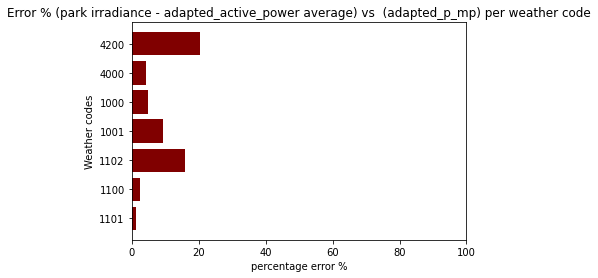

In [15]:
#Error % (park irradiance - active_power average) vs  (adaptive power) per weather code
wcode_errors['weather_code']=wcode_errors['weather_code'].map(int)

active_power=[]
adaptive_p_mp_temp=[]
for code in wcode_errors['weather_code']:
  for i,weatherCode in enumerate(df.weatherCode):
    if (code == weatherCode): 
      active_power.append(df.iloc[i].active_power)
      adaptive_p_mp_temp.append(df.iloc[i].p_mp_adapted)
  wcode_errors.loc[wcode_errors['weather_code'] == code, 'adapted_power/activePower'] = abs(sum(adaptive_p_mp_temp)-sum(active_power))/sum(active_power)*100
  active_power.clear()
  adaptive_p_mp_temp.clear()
wcode_errors['weather_code']=wcode_errors['weather_code'].map(str)

# creating the bar plot
plt.barh(wcode_errors.weather_code, wcode_errors['adapted_power/activePower'], color='maroon')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.ylabel("Weather codes")
plt.xlabel("percentage error %")
plt.title("Error % (park irradiance - adapted_active_power average) vs  (adapted_p_mp) per weather code")


In [16]:
wcode_errors

,weather_code,sensor_avg/clima,sensor_avg/openw,sensor_avg/horiz_avg,sensor_avg/tomorrow_modular,sensor_avg/openweathermap_modular,p_mp/active_power,adapted_power/activePower
0,1101,0.383876,4.60687,2.1115,13.9813,20.5094,22.3934,1.16211
2,1100,0.307632,31.8391,2.55861,3.1778,8.16488,19.7684,2.40493
7,1102,3.03449,90.645,2.70745,4.34024,17.0355,20.8491,16.0353
9,1001,8.12576,56.9926,7.3223,15.8413,16.3269,16.5302,9.35147
26,1000,3.63006,47.0442,6.84578,7.54644,14.5585,28.4924,4.79113
77,4000,10.2549,94.0221,25.9968,2.80497,25.2557,62.2127,4.21357
103,4200,73.1151,97.9746,92.4672,97.4017,127.678,142.079,20.2729


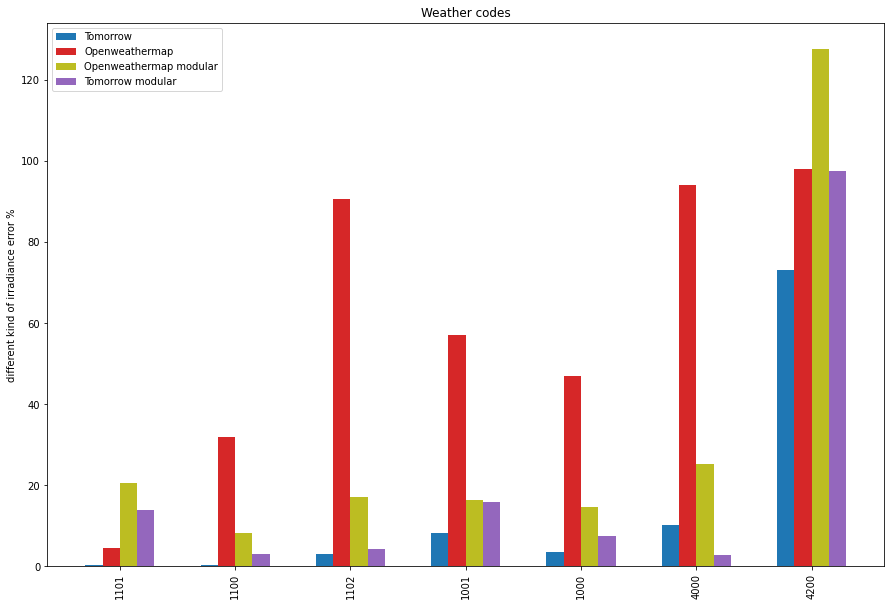

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))

# A little data preparation
years = wcode_errors.weather_code
x = np.arange(len(years))

width=0.15

# Plot each bar plot. Note: manually calculating the 'dodges' of the bars
ax.bar(x - 3*width/2, wcode_errors['sensor_avg/clima'], width, label='Tomorrow', color='tab:blue')
ax.bar(x - width/2, wcode_errors['sensor_avg/openw'], width, label='Openweathermap', color='tab:red')
ax.bar(x + width/2, wcode_errors['sensor_avg/openweathermap_modular'], width, label='Openweathermap modular', color='tab:olive')
ax.bar(x + 3*width/2, wcode_errors['sensor_avg/tomorrow_modular'], width, label='Tomorrow modular', color='tab:purple')

# Customise some display properties
ax.set_ylabel('different kind of irradiance error %')
ax.set_title('Weather codes')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(years.astype(str).values, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()

In [18]:
pvlib_errors_weather=pd.DataFrame()
pvlib_errors_weather['weather_code']=wcode_errors.weather_code
pvlib_errors_weather['p_mp/active_power']	=wcode_errors['p_mp/active_power']	
pvlib_errors_weather['adapted_power/activePower']=wcode_errors['adapted_power/activePower']

pvlib_errors_weather.to_csv('pvlib_errors_weather.csv', index=False)

!cp pvlib_errors_weather.csv "drive/My Drive/alexakos-thesis/datasets"